Initial Data Cleaning of Zillow Data

In [1]:
import os
import pandas as pd


In [2]:
cwd_path = os.getcwd()
data_path = cwd_path[:-9] + '\\data\\raw'
data_file = '0-Metro_inventory_and_sales_uc_sfrcondo_smoothed_week.csv'

file_path = data_path + '\\' + data_file
os.chdir(data_path)
os.listdir()


['.gitkeep',
 '0-Metro_inventory_and_sales_uc_sfrcondo_smoothed_week.csv',
 '02 - Metro_mlp_uc_sfrcondo_smoothed_week.csv',
 'unused']

In [5]:
df = pd.read_csv(file_path, parse_dates=True)

df.shape

(97, 166)

In [6]:
df.nunique()

RegionID      97
SizeRank      97
RegionName    97
RegionType     2
StateName     40
              ..
10/31/2020    95
11/7/2020     94
11/14/2020    94
11/21/2020    94
11/28/2020    96
Length: 166, dtype: int64

In [7]:
df.describe()

,RegionID,SizeRank,11/4/2017,11/11/2017,11/18/2017,11/25/2017,12/2/2017,12/9/2017,12/16/2017,12/23/2017,...,9/26/2020,10/3/2020,10/10/2020,10/17/2020,10/24/2020,10/31/2020,11/7/2020,11/14/2020,11/21/2020,11/28/2020
count,97.000000,97.000000,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,...,97.000000,97.000000,97.000000,97.000000,96.000000,95.000000,95.000000,95.000000,95.000000,97.000000
mean,402857.154639,48.731959,2.121808e+04,2.105019e+04,2.084300e+04,2.054203e+04,2.022951e+04,1.984591e+04,1.936940e+04,1.900018e+04,...,15819.742268,15677.453608,15602.659794,15470.670103,15483.739583,15452.852632,15244.336842,15006.694737,14738.873684,14102.453608
std,69695.842610,30.067118,1.332213e+05,1.321359e+05,1.308160e+05,1.289558e+05,1.270449e+05,1.247402e+05,1.219058e+05,1.197142e+05,...,96968.837049,95879.928974,95204.905556,94220.575739,93774.505778,93257.117502,91985.753417,90561.918370,88974.009065,85813.496393
min,102001.000000,0.000000,1.032000e+03,1.014000e+03,9.880000e+02,9.210000e+02,8.650000e+02,8.130000e+02,7.500000e+02,7.060000e+02,...,702.000000,715.000000,725.000000,736.000000,734.000000,729.000000,719.000000,692.000000,670.000000,631.000000
25%,394492.000000,24.000000,2.700000e+03,2.674000e+03,2.654000e+03,2.601000e+03,2.596000e+03,2.547000e+03,2.447000e+03,2.413000e+03,...,1881.000000,1867.000000,1873.000000,1864.000000,1820.000000,1765.500000,1734.500000,1701.000000,1657.000000,1577.000000
50%,394807.000000,48.000000,4.397000e+03,4.434000e+03,4.385000e+03,4.287000e+03,4.173000e+03,4.063000e+03,3.980000e+03,3.920000e+03,...,3223.000000,3229.000000,3224.000000,3212.000000,3208.000000,3168.000000,3109.000000,3038.000000,2973.000000,2885.000000
75%,395025.000000,72.000000,8.553000e+03,8.488000e+03,8.402000e+03,8.242000e+03,8.189000e+03,8.038000e+03,7.815000e+03,7.652000e+03,...,6234.000000,6151.000000,6129.000000,6072.000000,6050.250000,5960.500000,5875.500000,5807.500000,5723.500000,5436.000000
max,753924.000000,159.000000,1.316440e+06,1.305707e+06,1.292654e+06,1.274258e+06,1.255352e+06,1.232550e+06,1.204504e+06,1.182816e+06,...,957003.000000,946211.000000,939515.000000,929768.000000,920605.000000,910749.000000,898314.000000,884380.000000,868840.000000,846626.000000


In [8]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,11/4/2017,11/11/2017,11/18/2017,11/25/2017,12/2/2017,...,9/26/2020,10/3/2020,10/10/2020,10/17/2020,10/24/2020,10/31/2020,11/7/2020,11/14/2020,11/21/2020,11/28/2020
0,102001,0,United States,Country,NaN,1316440,1305707,1292654,1274258,1255352,...,957003,946211,939515,929768,920605.0,910749.0,898314.0,884380.0,868840.0,846626
1,394913,1,"New York, NY",Msa,NY,66741,65955,65011,63766,62590,...,65320,65610,65883,65811,65677.0,65285.0,64506.0,63732.0,62749.0,61368
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,17547,17202,16844,16380,15952,...,17588,17453,17389,17355,17343.0,17470.0,17348.0,17082.0,16673.0,16002
3,394463,3,"Chicago, IL",Msa,IL,37392,36734,35941,34891,33862,...,31570,31544,31633,31494,31312.0,30958.0,30460.0,29884.0,29181.0,28234
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,21837,21551,21308,20887,20404,...,20894,20485,20201,19850,19493.0,19061.0,18641.0,18214.0,17799.0,17245


In [9]:
df.drop(columns=['RegionType', 'RegionID'], axis=1, inplace=True)

In [10]:
df.head(20)

,SizeRank,RegionName,StateName,11/4/2017,11/11/2017,11/18/2017,11/25/2017,12/2/2017,12/9/2017,12/16/2017,...,9/26/2020,10/3/2020,10/10/2020,10/17/2020,10/24/2020,10/31/2020,11/7/2020,11/14/2020,11/21/2020,11/28/2020
0,0,United States,NaN,1316440,1305707,1292654,1274258,1255352,1232550,1204504,...,957003,946211,939515,929768,920605.0,910749.0,898314.0,884380.0,868840.0,846626
1,1,"New York, NY",NY,66741,65955,65011,63766,62590,61298,59719,...,65320,65610,65883,65811,65677.0,65285.0,64506.0,63732.0,62749.0,61368
2,2,"Los Angeles-Long Beach-Anaheim, CA",CA,17547,17202,16844,16380,15952,15455,14793,...,17588,17453,17389,17355,17343.0,17470.0,17348.0,17082.0,16673.0,16002
3,3,"Chicago, IL",IL,37392,36734,35941,34891,33862,32828,31682,...,31570,31544,31633,31494,31312.0,30958.0,30460.0,29884.0,29181.0,28234
4,4,"Dallas-Fort Worth, TX",TX,21837,21551,21308,20887,20404,19908,19218,...,20894,20485,20201,19850,19493.0,19061.0,18641.0,18214.0,17799.0,17245
5,5,"Philadelphia, PA",PA,24368,24688,24699,24498,24003,23081,22364,...,13781,13777,13712,13573,13456.0,13295.0,13141.0,12986.0,12802.0,12503
6,6,"Houston, TX",TX,26785,26591,26326,25991,25691,25349,24976,...,23863,23587,23365,23141,23055.0,22741.0,22461.0,22117.0,21816.0,21422
7,7,"Washington, DC",DC,18025,18483,18997,19629,20194,19721,19081,...,11634,11753,11817,11772,11839.0,11812.0,11731.0,11590.0,11397.0,11029
8,8,"Miami-Fort Lauderdale, FL",FL,43636,43953,44262,44409,44625,44838,44873,...,42064,41712,41806,41802,41654.0,41543.0,41325.0,41088.0,41014.0,40722
9,9,"Atlanta, GA",GA,26827,26463,26034,25444,24860,24347,23752,...,22673,22410,22271,22083,21958.0,21718.0,21445.0,21092.0,20655.0,20015


In [11]:
#df.drop(columns=['StateName'], axis=1, inplace=True)

In [15]:
df.head()

,SizeRank,RegionName,StateName,11/4/2017,11/11/2017,11/18/2017,11/25/2017,12/2/2017,12/9/2017,12/16/2017,...,9/26/2020,10/3/2020,10/10/2020,10/17/2020,10/24/2020,10/31/2020,11/7/2020,11/14/2020,11/21/2020,11/28/2020
0,0,United States,NaN,1316440,1305707,1292654,1274258,1255352,1232550,1204504,...,957003,946211,939515,929768,920605.0,910749.0,898314.0,884380.0,868840.0,846626
1,1,"New York, NY",NY,66741,65955,65011,63766,62590,61298,59719,...,65320,65610,65883,65811,65677.0,65285.0,64506.0,63732.0,62749.0,61368
2,2,"Los Angeles-Long Beach-Anaheim, CA",CA,17547,17202,16844,16380,15952,15455,14793,...,17588,17453,17389,17355,17343.0,17470.0,17348.0,17082.0,16673.0,16002
3,3,"Chicago, IL",IL,37392,36734,35941,34891,33862,32828,31682,...,31570,31544,31633,31494,31312.0,30958.0,30460.0,29884.0,29181.0,28234
4,4,"Dallas-Fort Worth, TX",TX,21837,21551,21308,20887,20404,19908,19218,...,20894,20485,20201,19850,19493.0,19061.0,18641.0,18214.0,17799.0,17245


In [17]:
mdf = pd.melt(df, id_vars = ['RegionName', 'SizeRank', 'StateName'])
mdf[mdf['RegionName'] == 'Chicago, IL']

,RegionName,SizeRank,StateName,variable,value
3,"Chicago, IL",3,IL,11/4/2017,37392.0
100,"Chicago, IL",3,IL,11/11/2017,36734.0
197,"Chicago, IL",3,IL,11/18/2017,35941.0
294,"Chicago, IL",3,IL,11/25/2017,34891.0
391,"Chicago, IL",3,IL,12/2/2017,33862.0
...,...,...,...,...,...
15135,"Chicago, IL",3,IL,10/31/2020,30958.0
15232,"Chicago, IL",3,IL,11/7/2020,30460.0
15329,"Chicago, IL",3,IL,11/14/2020,29884.0
15426,"Chicago, IL",3,IL,11/21/2020,29181.0


In [23]:
transpose = pd.DataFrame(data=df)

In [24]:
transpose = transpose.T


In [25]:
transpose.columns = transpose.iloc[1]

In [26]:
transpose.head()

"New York, NY",United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
1,,,,,,,,,,,,,,,,,,,,,
1,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,94,96,100,159
"New York, NY",United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Jackson, MS","Augusta, GA","Harrisburg, PA","Provo, UT","Fort Collins, CO"
NY,NaN,NY,CA,IL,TX,PA,TX,DC,FL,GA,...,WI,FL,UT,FL,IA,MS,GA,PA,UT,CO
66741,1316440,66741,17547,37392,21837,24368,26785,18025,43636,26827,...,2542,2661,1354,4397,3393,2213,3071,2219,1215,1699
65955,1305707,65955,17202,36734,21551,24688,26591,18483,43953,26463,...,2480,2632,1333,4434,3349,2203,3056,2259,1198,1651


In [62]:
mdf['week'] = pd.to_datetime(mdf['variable'])
mdf.drop(columns='variable', axis=1, inplace=True)

In [65]:
mdf.rename(columns={'value':'inventory'}, inplace=True)

In [66]:
sat_inventory = mdf[mdf['RegionName'] == 'San Antonio, TX']
sat_inventory

,RegionName,SizeRank,inventory,week
26,"San Antonio, TX",26,8553.0,2017-11-04
123,"San Antonio, TX",26,8492.0,2017-11-11
220,"San Antonio, TX",26,8430.0,2017-11-18
317,"San Antonio, TX",26,8336.0,2017-11-25
414,"San Antonio, TX",26,8189.0,2017-12-02
...,...,...,...,...
15158,"San Antonio, TX",26,7861.0,2020-10-31
15255,"San Antonio, TX",26,7804.0,2020-11-07
15352,"San Antonio, TX",26,7764.0,2020-11-14
15449,"San Antonio, TX",26,7693.0,2020-11-21


In [78]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:xlabel='week'>

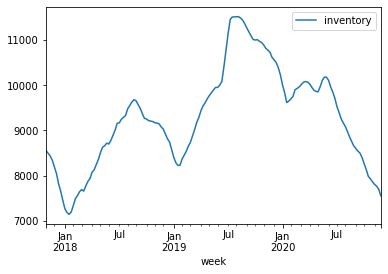

In [69]:
sat_inventory.plot(kind='line', x='week', y='inventory')

In [70]:
atx_inventory = mdf[mdf['RegionName'] == 'Austin, TX']

<AxesSubplot:xlabel='week'>

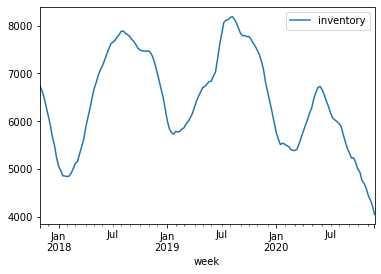

In [71]:
atx_inventory.plot(kind='line', x='week', y='inventory')

<AxesSubplot:xlabel='week'>

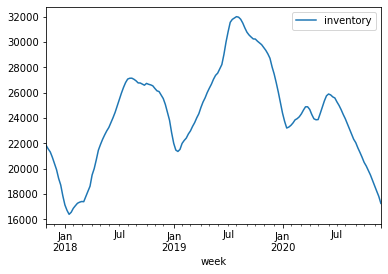

In [82]:
dfw_inventory =  mdf[mdf['RegionName'] == 'Dallas-Fort Worth, TX']
dfw_inventory.plot(kind='line',  x='week', y='inventory')
#plt.pyplot.plot(dfw_inventory['week'], dfw_inventory['inventory'])

#sns.lineplot(data=dfw_inventory, x='week', y='inventory')

In [77]:
dfw_inventory.dtypes

RegionName            object
SizeRank               int64
inventory            float64
week          datetime64[ns]
dtype: object

<AxesSubplot:xlabel='week'>

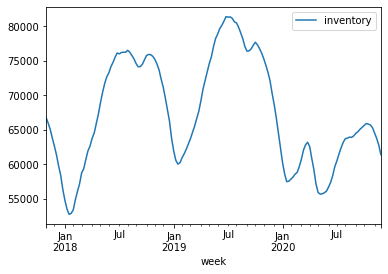

In [84]:
nyc_inventory =  mdf[mdf['RegionName'] == 'New York, NY']

nyc_inventory.plot(kind='line',  x='week', y='inventory')

<AxesSubplot:xlabel='week'>

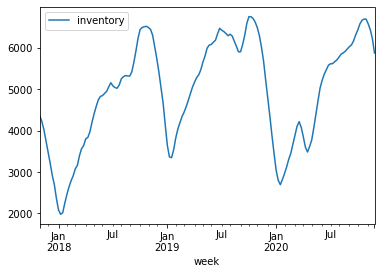

In [85]:
sfo_inventory =  mdf[mdf['RegionName'] == 'San Francisco, CA']

sfo_inventory.plot(kind='line',  x='week', y='inventory')

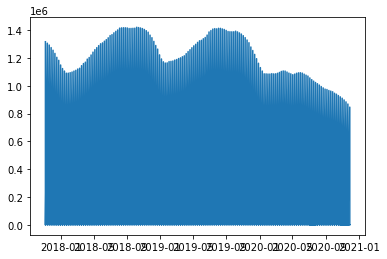

In [89]:
plt.pyplot.plot(mdf['week'], mdf['inventory'])